# Preparation
- Download data from https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load & glance the data
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# for later ploting convenience, we use only one feature `sqft_living` to predict `price`
dimensions = ["sqft_living"]
df[dimensions].head(5)

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [5]:
# prepare train & test data
test_size = 100

x_train = df[dimensions][:-test_size]
x_test = df[dimensions][-test_size:]

y_train = df["price"][:-test_size]
y_test = df["price"][-test_size:]

In [6]:
# try to minimize ordinary least squares
# see more details from http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

reg.coef_

/Users/Altynai/.virtualenvs/MachineLearningNotes/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([280.13491379])

In [7]:
# use `sklearn.metrics.r2_score` to quantize prediction
from sklearn.metrics import r2_score

y_pred = reg.predict(x_test)
# 1.0 means perfect prediction
r2_score(y_test, y_pred)

0.5137659189824504

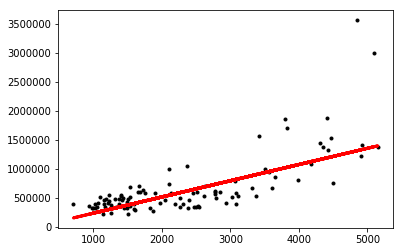

In [8]:
# visualize prediction
def visualize(x_test, y_test, y_pred):
    x_series = x_test.iloc[:,0]
    plt.scatter(x_series, y_test, color='black', marker=".")
    plt.plot(x_series, y_pred, color='red', linewidth=3)

    plt.xticks()
    plt.yticks()
    plt.show()

visualize(x_test, y_test, y_pred)